<a href="https://colab.research.google.com/github/DharavathYamuna/Visa-Processing-Time-Prediction/blob/main/Milestone_2_EDA_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Milestone 2: Exploratory Data Analysis and Feature Engineering

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset..csv.xlsx to dataset..csv.xlsx


In [5]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset..csv.xlsx')
df.head()


,Category and Form Number,Description,Forms Received1,Approved2,Denied3,Total Completions4,Pending5,Processing Time6
0,I-129F,Petition for Alien Fiancé(e),11903,4804,2683,7487,36053,7.2
1,I-130,Petition for Alien Relative (Immediate Relative),188381,211975,15209,227184,871740,14.4
2,I-130,Petition for Alien Relative (All Other Relative),58328,15627,17707,33334,1529528,36.5
3,I-6007,Petition to Classify Orphan as an Immediate Re...,143,101,80,181,617,8.5
4,I-601A,Application for Provisional Unlawful Presence ...,9957,14359,1664,16023,79281,27.8


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Category and Form Number  62 non-null     object 
 1   Description               62 non-null     object 
 2   Forms Received1           62 non-null     object 
 3   Approved2                 60 non-null     object 
 4   Denied3                   60 non-null     object 
 5   Total Completions4        62 non-null     object 
 6   Pending5                  62 non-null     object 
 7   Processing Time6          60 non-null     float64
dtypes: float64(1), object(7)
memory usage: 4.0+ KB


In [7]:
df.columns


Index(['Category and Form Number', 'Description', 'Forms Received1',
       'Approved2', 'Denied3', 'Total Completions4', 'Pending5',
       'Processing Time6'],
      dtype='object')

In [8]:
num_cols = [
    'Forms Received1',
    'Approved2',
    'Denied3',
    'Total Completions4',
    'Pending5',
    'Processing Time6'
]
for col in num_cols:
    df[col] = df[col].replace(['D', 'H', '-', 'N/A'], np.nan)
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Category and Form Number  62 non-null     object 
 1   Description               62 non-null     object 
 2   Forms Received1           59 non-null     float64
 3   Approved2                 56 non-null     float64
 4   Denied3                   55 non-null     float64
 5   Total Completions4        60 non-null     float64
 6   Pending5                  61 non-null     float64
 7   Processing Time6          60 non-null     float64
dtypes: float64(6), object(2)
memory usage: 4.0+ KB


/tmp/ipython-input-1889818080.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(['D', 'H', '-', 'N/A'], np.nan)
/tmp/ipython-input-1889818080.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(['D', 'H', '-', 'N/A'], np.nan)
/tmp/ipython-input-1889818080.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior,

In [ ]:
Missing Value Analysis

In [10]:
print(df.isnull().sum())

Category and Form Number    0
Description                 0
Forms Received1             3
Approved2                   6
Denied3                     7
Total Completions4          2
Pending5                    1
Processing Time6            2
dtype: int64


In [11]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print(df.isnull().sum())


Category and Form Number    0
Description                 0
Forms Received1             0
Approved2                   0
Denied3                     0
Total Completions4          0
Pending5                    0
Processing Time6            0
dtype: int64


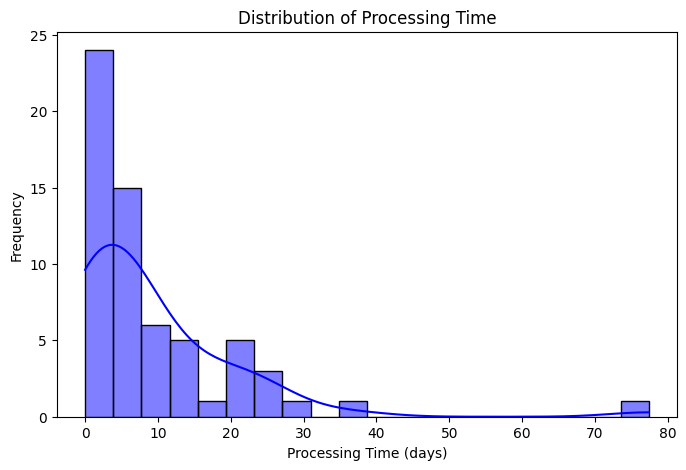

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Processing Time6'], kde=True, color='blue', bins=20)
plt.title('Distribution of Processing Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Frequency')
plt.show()


In [13]:
df.describe()

,Forms Received1,Approved2,Denied3,Total Completions4,Pending5,Processing Time6
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000
mean,55829.709677,36755.274194,5321.838710,46930.935484,1.897614e+05,9.187097
std,101634.596943,84161.767760,11503.023107,95925.357247,3.384351e+05,12.260308
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1330.750000,497.250000,261.500000,1124.750000,2.109000e+03,1.750000
50%,11903.000000,4571.500000,881.000000,6702.000000,4.628700e+04,5.550000
75%,66824.000000,23788.250000,4754.500000,39577.000000,2.064548e+05,12.600000
max,567509.000000,536258.000000,67258.000000,585559.000000,1.529528e+06,77.400000


In [ ]:
Correlation Analysis


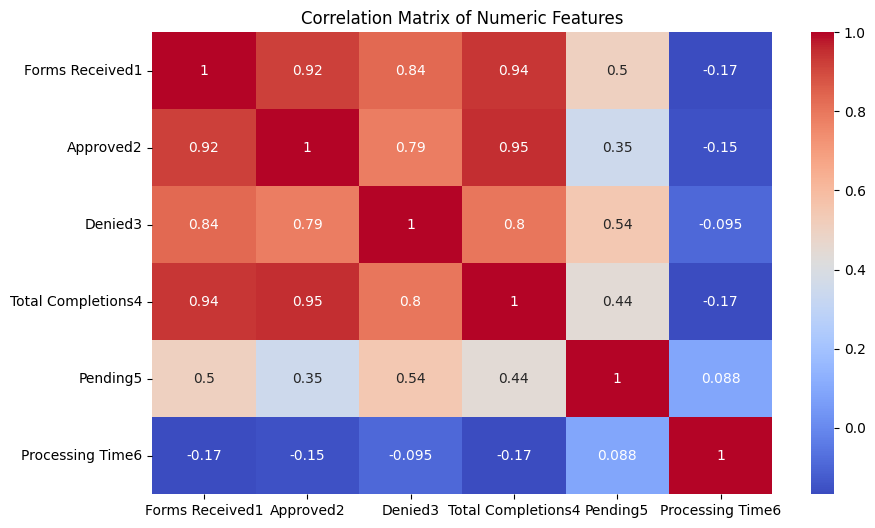

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['Forms Received1', 'Approved2', 'Denied3', 'Total Completions4', 'Pending5', 'Processing Time6']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:
 Feature Engineering

In [15]:
df['Approval_Rate'] = df['Approved2'] / df['Forms Received1']
df['Denial_Rate'] = df['Denied3'] / df['Forms Received1']
df['Completion_Rate'] = df['Total Completions4'] / df['Forms Received1']
df.replace([float('inf'), -float('inf')], 0, inplace=True)
df.fillna(0, inplace=True)
df.head()


,Category and Form Number,Description,Forms Received1,Approved2,Denied3,Total Completions4,Pending5,Processing Time6,Approval_Rate,Denial_Rate,Completion_Rate
0,I-129F,Petition for Alien Fiancé(e),11903.0,4804.0,2683.0,7487.0,36053.0,7.2,0.403596,0.225405,0.629001
1,I-130,Petition for Alien Relative (Immediate Relative),188381.0,211975.0,15209.0,227184.0,871740.0,14.4,1.125246,0.080735,1.205981
2,I-130,Petition for Alien Relative (All Other Relative),58328.0,15627.0,17707.0,33334.0,1529528.0,36.5,0.267916,0.303576,0.571492
3,I-6007,Petition to Classify Orphan as an Immediate Re...,143.0,101.0,80.0,181.0,617.0,8.5,0.706294,0.559441,1.265734
4,I-601A,Application for Provisional Unlawful Presence ...,9957.0,14359.0,1664.0,16023.0,79281.0,27.8,1.442101,0.167119,1.609220


In [ ]:
 Final Data Review


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Category and Form Number  62 non-null     object 
 1   Description               62 non-null     object 
 2   Forms Received1           62 non-null     float64
 3   Approved2                 62 non-null     float64
 4   Denied3                   62 non-null     float64
 5   Total Completions4        62 non-null     float64
 6   Pending5                  62 non-null     float64
 7   Processing Time6          62 non-null     float64
 8   Approval_Rate             62 non-null     float64
 9   Denial_Rate               62 non-null     float64
 10  Completion_Rate           62 non-null     float64
dtypes: float64(9), object(2)
memory usage: 5.5+ KB


,Forms Received1,Approved2,Denied3,Total Completions4,Pending5,Processing Time6,Approval_Rate,Denial_Rate,Completion_Rate
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.000000,62.000000
mean,55829.709677,36755.274194,5321.838710,46930.935484,1.897614e+05,9.187097,11.140059,2.333995,4.933665
std,101634.596943,84161.767760,11503.023107,95925.357247,3.384351e+05,12.260308,51.886835,10.068803,27.054111
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1330.750000,497.250000,261.500000,1124.750000,2.109000e+03,1.750000,0.182559,0.035505,0.457400
50%,11903.000000,4571.500000,881.000000,6702.000000,4.628700e+04,5.550000,0.595860,0.087444,0.774015
75%,66824.000000,23788.250000,4754.500000,39577.000000,2.064548e+05,12.600000,0.929997,0.218261,1.088819
max,567509.000000,536258.000000,67258.000000,585559.000000,1.529528e+06,77.400000,380.958333,73.416667,209.437500


In [20]:
print(df.isnull().sum())



Category and Form Number    0
Description                 0
Forms Received1             0
Approved2                   0
Denied3                     0
Total Completions4          0
Pending5                    0
Processing Time6            0
Approval_Rate               0
Denial_Rate                 0
Completion_Rate             0
dtype: int64
